In [1]:
'''
Module 4 Challenge
Larry Gagnon
Create an analysis notebook that analyses and visualises the major metrics of the portfolios across volatility, returns, risk, and Sharpe ratios.
Determine which portfolio outperformed the others. 
'''

'\nModule 4 Challenge\nLarry Gagnon\nCreate an analysis notebook that analyses and visualises the major metrics of the portfolios across volatility, returns, risk, and Sharpe ratios.\nDetermine which portfolio outperformed the others. \n'

In [2]:
'''
Prepare the Data
First, you will read in and clean several CSV files for analysis. 
The CSV files contain data on whale portfolio returns, algorithmic trading portfolio returns, 
and S&P TSX 60 historical prices. 
Use the Whale Analysis starter code.
'''

'\nPrepare the Data\nFirst, you will read in and clean several CSV files for analysis. \nThe CSV files contain data on whale portfolio returns, algorithmic trading portfolio returns, \nand S&P TSX 60 historical prices. \nUse the Whale Analysis starter code.\n'

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline 

In [4]:
'''
Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.
whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.
algo_returns.csv: Contains returns from the in-house trading algorithms from your company.
sp_tsx_history.csv: Contains historical closing prices of the S&P TSX 60 Index.
'''

'\nUse Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.\nwhale_returns.csv: Contains returns of some famous "whale" investors\' portfolios.\nalgo_returns.csv: Contains returns from the in-house trading algorithms from your company.\nsp_tsx_history.csv: Contains historical closing prices of the S&P TSX 60 Index.\n'

In [5]:
whale_ret_csv = Path("data/whale_returns.csv")
whale_df = pd.read_csv(whale_ret_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()
#Data cleaning. Determine data types and count entries to determine Null values.
# whale_df.dtypes
# whale_df.count()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
sp_tsx_history_csv = Path("data/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.sort_index(inplace=True)
sp_tsx_history_df.head()
# Data cleaning. Determine data types and count entries to determine Null values.
# sp_tsx_history_df.dtypes
# sp_tsx_history_df.count()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [7]:
shop_historical_csv = Path("data/shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_df.sort_index(inplace=True)
shop_historical_df.head()
# Data cleaning. Determine data types and count entries to determine Null values.
# shop_historical_df.dtypes
# shop_historical_df.count()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [8]:
otex_historical_csv = Path("data/otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_df.sort_index(inplace=True)
otex_historical_df.head()
# Data cleaning. Determine data types and count entries to determine Null values.
# otex_historical_df.dtypes
# otex_historical_df.count()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [9]:
l_historical_csv = Path("data/l_historical.csv")
l_historical_df = pd.read_csv(l_historical_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_historical_df.sort_index(inplace=True)
l_historical_df.head()
# Data cleaning. Determine data types and count entries to determine Null values.
# l_historical_df.dtypes
# l_historical_df.count()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [10]:
algo_returns_csv = Path("data/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
# algo_returns_df.head()
# Data cleaning. Determine data types and count entries to determine Null values.
algo_returns_df.dtypes
# algo_returns_df.count()

Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
# Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.
# REMOVE THE $$ AND THE COMMA from the Close column of sp_tsx_history_df.

In [12]:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
# Must also remove commas in those values or STR will not convert to FLOAT
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"].head()
# sp_tsx_history_df.dtypes

C:\Users\LarryGagnon\AppData\Local\Temp\ipykernel_3892\781843480.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Close, dtype: object

In [13]:
#Identify and remove null values.
# Two dataframes contain null values. algo_returns_df and what__ret_df.

In [14]:
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [15]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
whale_df = whale_df.dropna().copy()
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [17]:
algo_returns_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [18]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [19]:
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.count()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [20]:
# The whale portfolios and algorithmic portfolio CSV files contain daily returns, 
# but the S&P TSX 60 CSV file contains closing prices. 
#Convert the S&P TSX 60 closing prices to daily returns.
# Use pct change and do not forget to change column name

In [21]:
sp_tsx_history_df = sp_tsx_history_df.rename({"Close":"S&P Daily"}, axis='columns')
sp_tsx_daily_df = sp_tsx_history_df['S&P Daily'].astype('float').pct_change()
sp_tsx_daily_df.head()

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: S&P Daily, dtype: float64

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# returns-dataframe.png
# DO an inner join columns concat() and define the axis=1
# Add columns with names: Soros, Paulson, Tiger, Berkshire, Algo1 Algo2  S&P TSX

In [23]:
whale_algo_sp_df = pd.concat([whale_df, algo_returns_df, sp_tsx_daily_df], axis=1, join="inner")
whale_algo_sp_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [24]:
# Performance Analysis
# Calculate and plot daily returns of all portfolios.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

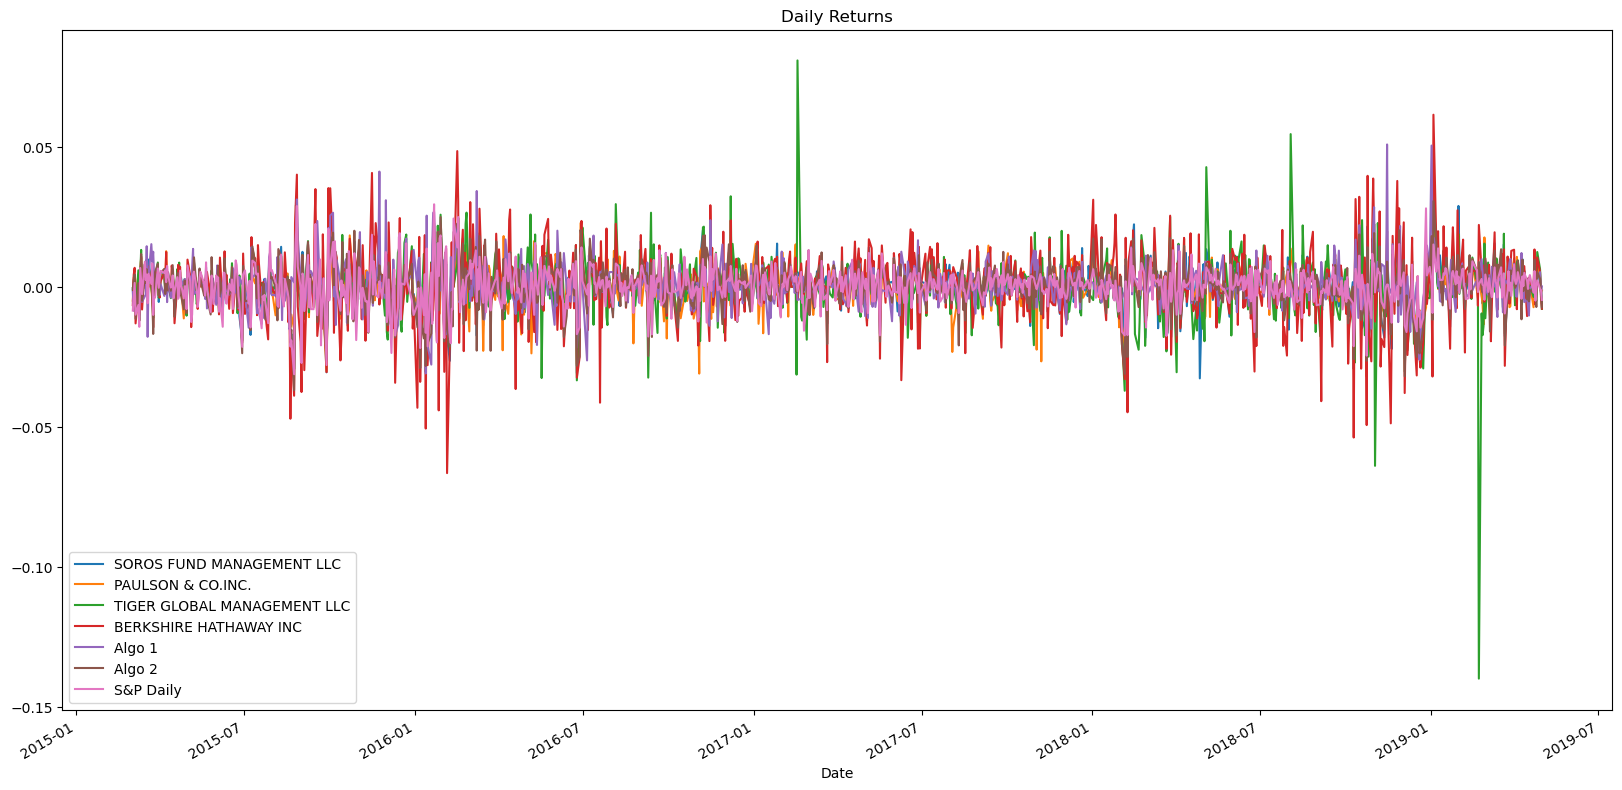

In [25]:
# Daily returns of all Portfolios
whale_algo_sp_df.plot(figsize=(20, 10), title="Daily Returns")

In [26]:
# Calculate and plot cumulative returns for all portfolios. 
# Does any portfolio outperform the S&P TSX 60?
# Answer: The clear winner is Algo 1

<AxesSubplot:title={'center':'Comparison of Cumulative Returns'}, xlabel='Date'>

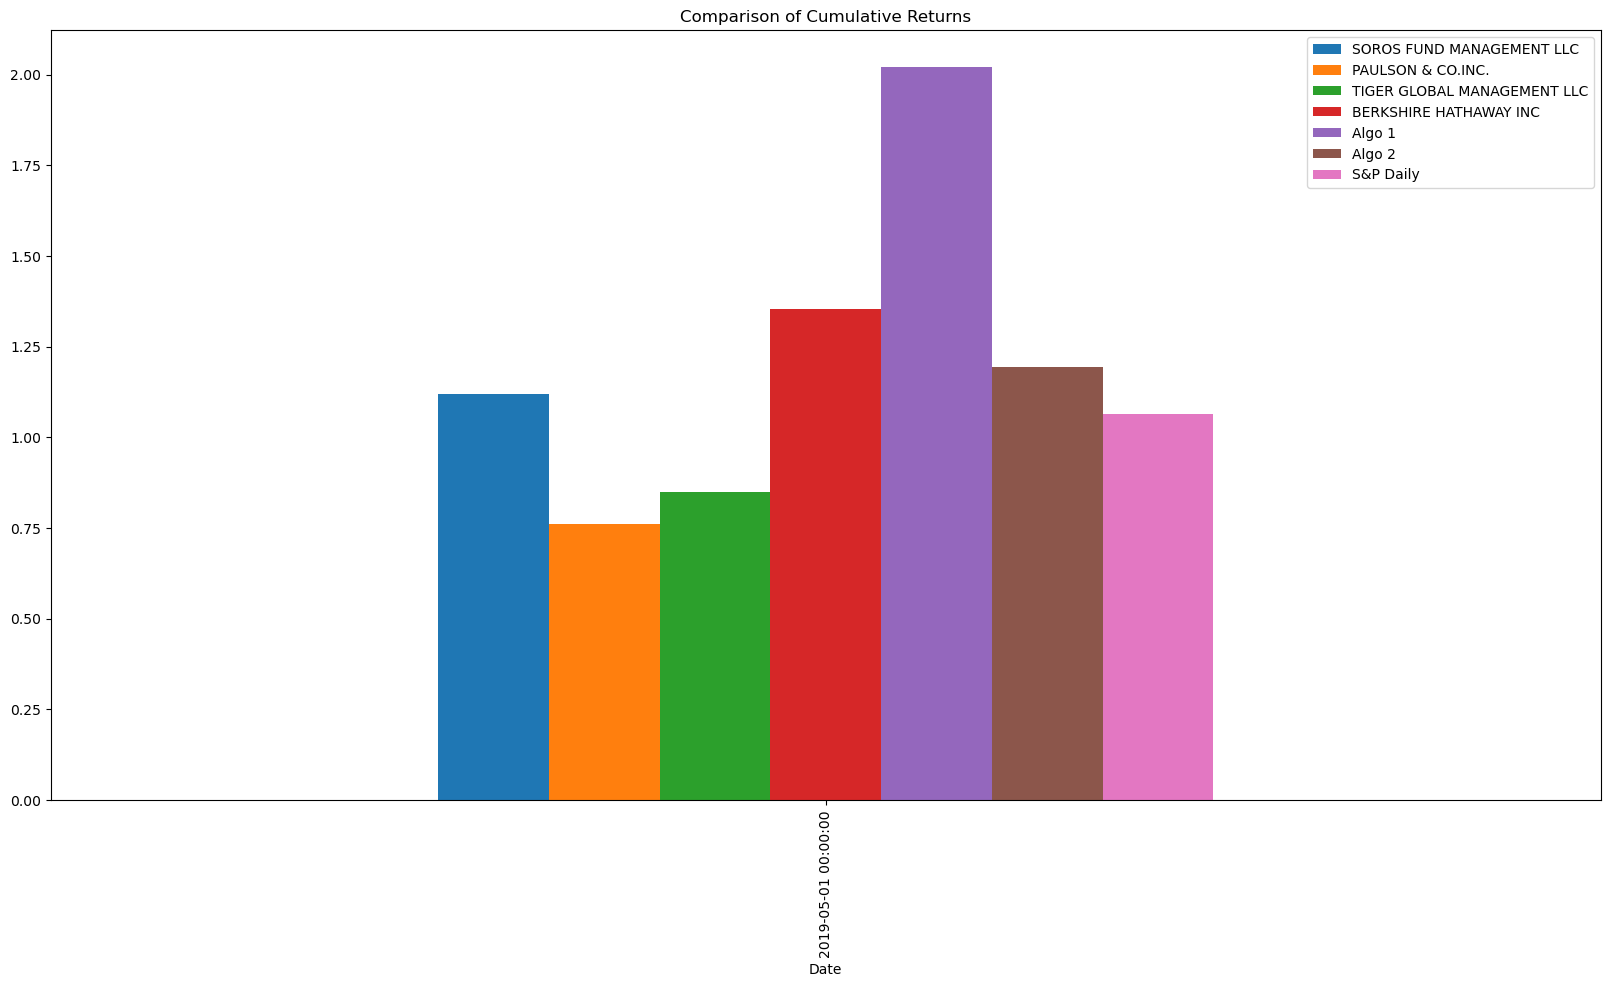

In [27]:
cumulative_returns = (1 + whale_algo_sp_df).cumprod()
cumulative_returns.tail(1).plot(figsize=(20, 10), title="Comparison of Cumulative Returns", kind="bar")

In [28]:
# Performance Analysis
# Calculate the Daily Returns of ALL portfolios
# Algo, Whale and S&P are already completed above.
#shop_daily returns calulation based on shop_historical close values. Column renamed as well.

In [29]:
shop_daily_df = shop_historical_df.rename({"Close":"Shop Daily"}, axis='columns')
shop_daily_df = shop_daily_df['Shop Daily'].astype('float').pct_change()
shop_daily_df

Date
2018-01-02         NaN
2018-01-03    0.023398
2018-01-04    0.017092
2018-01-05   -0.001455
2018-01-08    0.016392
                ...   
2019-12-20   -0.005503
2019-12-23   -0.003118
2019-12-24    0.026915
2019-12-27    0.017834
2019-12-30   -0.031734
Name: Shop Daily, Length: 501, dtype: float64

In [30]:
l_daily_df = l_historical_df.rename({"Close":"L Daily"}, axis='columns')
l_daily_df = l_daily_df['L Daily'].astype('float').pct_change()
l_daily_df

Date
2018-01-02         NaN
2018-01-03   -0.010002
2018-01-04    0.000174
2018-01-05    0.000000
2018-01-08   -0.009753
                ...   
2019-12-20    0.003547
2019-12-23   -0.003240
2019-12-24   -0.000148
2019-12-27    0.001626
2019-12-30   -0.006639
Name: L Daily, Length: 501, dtype: float64

In [31]:
otex_daily_df = otex_historical_df.rename({"Close":"OTEX Daily"}, axis='columns')
otex_daily_df = otex_daily_df['OTEX Daily'].astype('float').pct_change()
otex_daily_df

Date
2018-01-02         NaN
2018-01-03   -0.011703
2018-01-04   -0.003715
2018-01-05   -0.007924
2018-01-08   -0.009631
                ...   
2019-12-20    0.024441
2019-12-23   -0.013463
2019-12-24   -0.007773
2019-12-27    0.004526
2019-12-30   -0.008839
Name: OTEX Daily, Length: 501, dtype: float64

<AxesSubplot:title={'center':'S&P TSX'}, xlabel='Date', ylabel='Daily Return'>

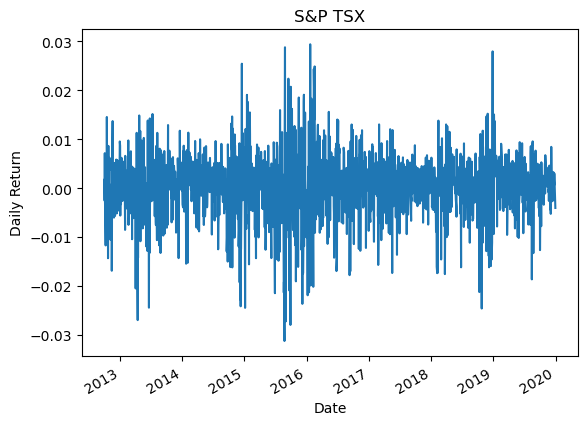

In [32]:
# Plot the Daily returns of all portfolios
sp_tsx_daily_df.plot(title="S&P TSX", xlabel="Date", ylabel="Daily Return")

<AxesSubplot:title={'center':'Whale'}, xlabel='Date', ylabel='Daily Return'>

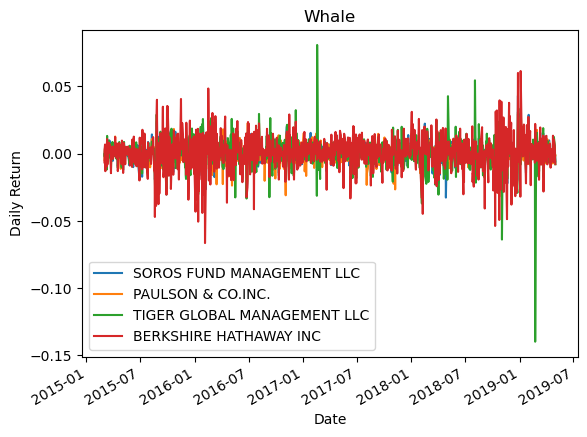

In [33]:
# Plot the Daily returns of all portfolios
whale_df.plot(title="Whale", xlabel="Date", ylabel="Daily Return")

<AxesSubplot:title={'center':'Otex'}, xlabel='Date', ylabel='Daily Return'>

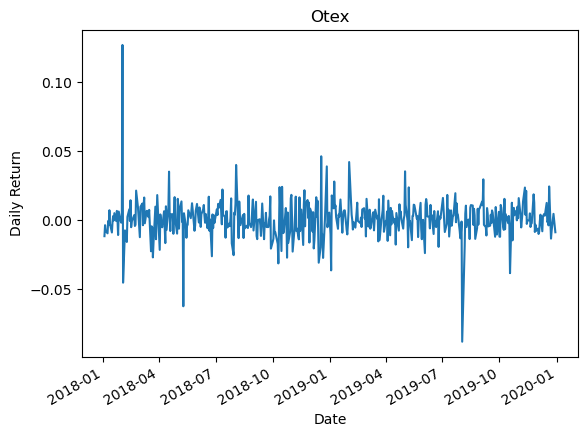

In [34]:
# Plot the Daily returns of all portfolios
otex_daily_df.plot(title="Otex", xlabel="Date", ylabel="Daily Return")

<AxesSubplot:title={'center':'Algo'}, xlabel='Date', ylabel='Daily Return'>

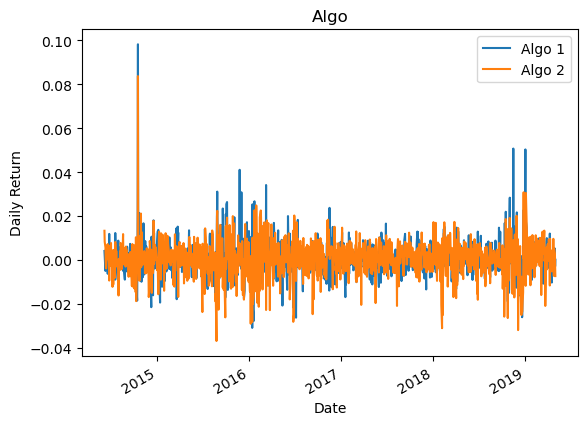

In [35]:
# Plot the Daily returns of all portfolios
algo_returns_df.plot(title="Algo", xlabel="Date", ylabel="Daily Return")

<AxesSubplot:title={'center':'Shop'}, xlabel='Date', ylabel='Daily Return'>

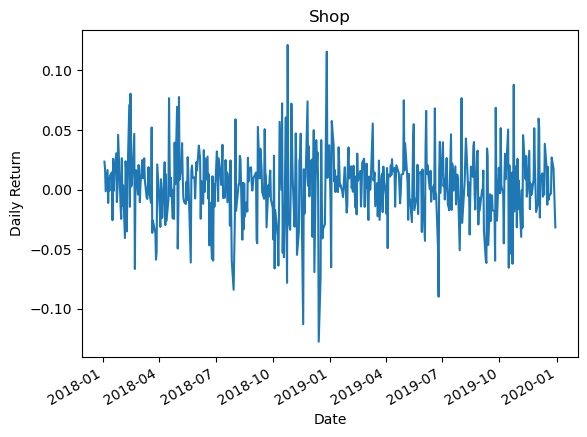

In [36]:
# Plot the Daily returns of all portfolios
shop_daily_df.plot(title="Shop", xlabel="Date", ylabel="Daily Return")

<AxesSubplot:title={'center':'L'}, xlabel='Date', ylabel='Daily Return'>

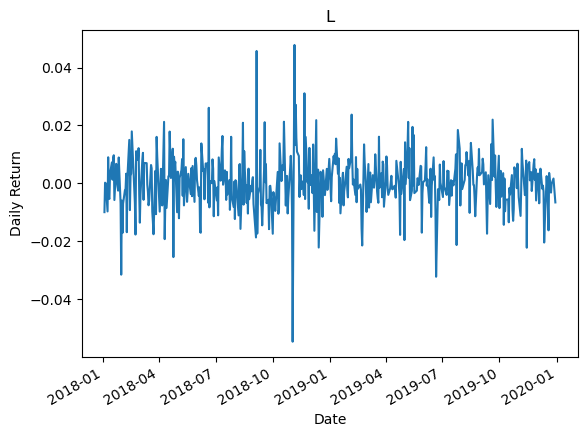

In [37]:
# Plot the Daily returns of all portfolios
l_daily_df.plot(title="L", xlabel="Date", ylabel="Daily Return")

In [38]:
# Create a box plot for each of the returns

<AxesSubplot:title={'center':'All Portfolio Returns'}>

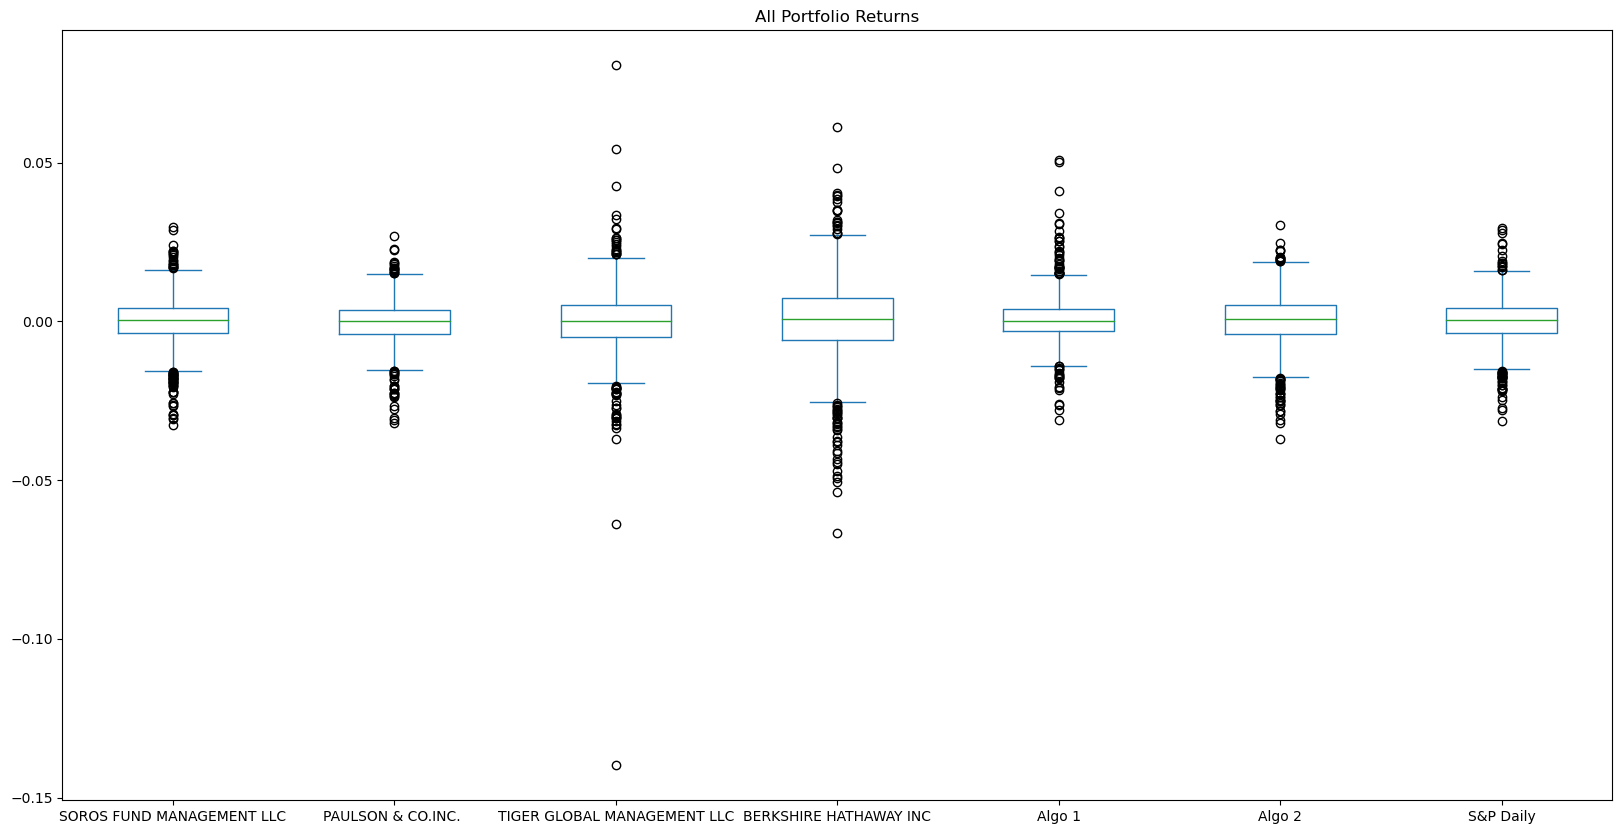

In [39]:
whale_algo_sp_df.plot(figsize=(20, 10), title="All Portfolio Returns", kind='box')

In [40]:
# Calculating standard deviation for each portfolio. Use the concatenated file whale_algo_sp_df. 

In [41]:
whale_algo_sp_df_std = whale_algo_sp_df.std()
whale_algo_sp_df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P Daily                      0.007034
dtype: float64

In [42]:
# Risk Analysis
# Determine which portfolios are riskier than the S&P TSX 60.
# Answer: Algo is riskier than TSX.

<AxesSubplot:ylabel='Frequency'>

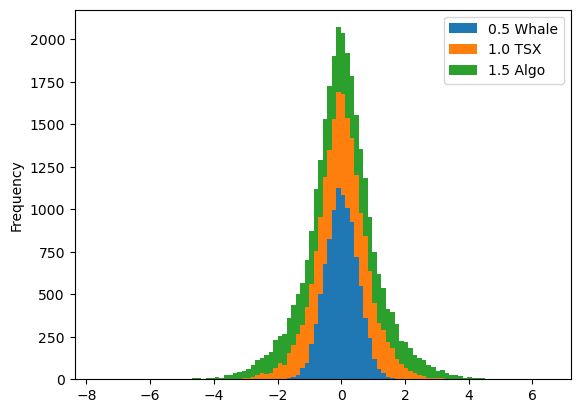

In [43]:
whale_df_std = whale_df.std()
sp_tsx_daily_df_std = sp_tsx_daily_df.std()
algo_returns_df_std = algo_returns_df.std()

whale_df_std = np.random.normal(scale=0.5, size=10000)
sp_tsx_daily_df_std = np.random.normal(scale=1.0, size=10000)
algo_returns_df_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5 Whale": whale_df_std,
    "1.0 TSX": sp_tsx_daily_df_std,
    "1.5 Algo": algo_returns_df_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

In [44]:
# Calculate the annualised standard deviation. 

In [45]:
annual_whale_df_std = whale_df_std * np.sqrt(252)
annual_sp_tsx_daily_df_std = sp_tsx_daily_df_std * np.sqrt(252)
annual_algo_returns_df_std = algo_returns_df_std * np.sqrt(252) 
# annual_whale_df_std
# annual_sp_tsx_daily_df_std
# annual_algo_returns_df_std

In [46]:
# Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window.

<AxesSubplot:xlabel='Date'>

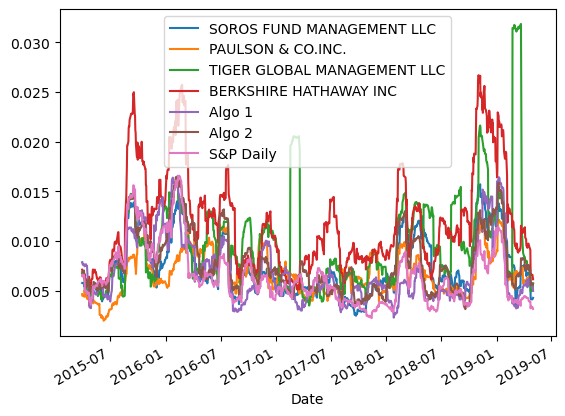

In [47]:
whale_algo_sp_df.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

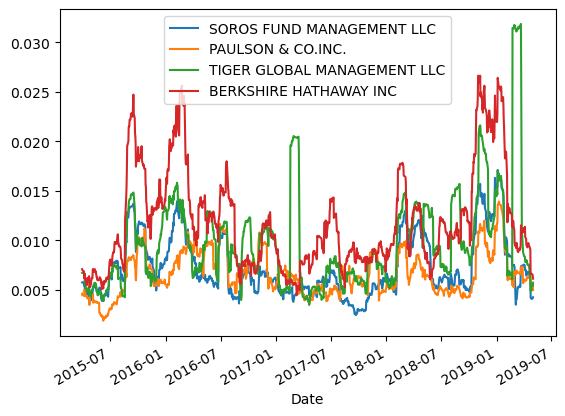

In [48]:
whale_df.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

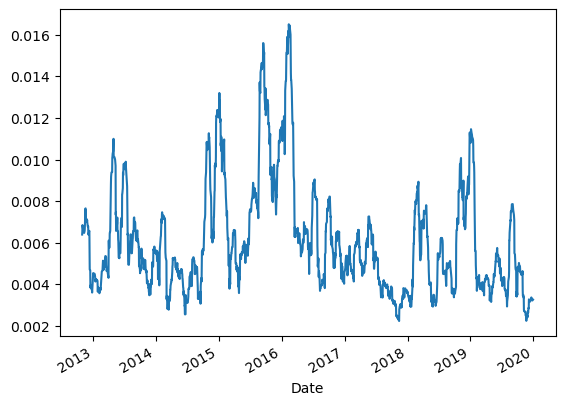

In [49]:
sp_tsx_daily_df.rolling(window=21).std().plot()

<AxesSubplot:xlabel='Date'>

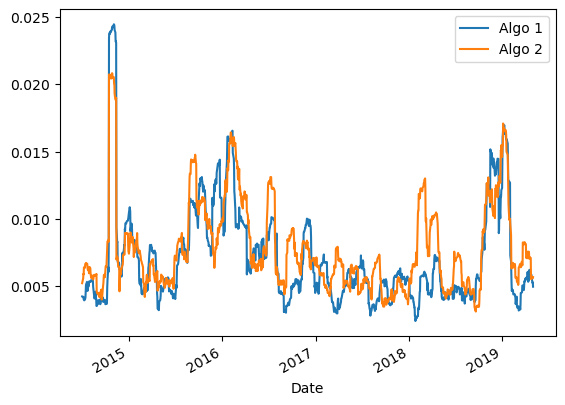

In [50]:
algo_returns_df.rolling(window=21).std().plot()

In [51]:
'''
Rolling Statistics
Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P TSX 60.



Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P TSX 60.
 beta = covariance[0,1]/covariance[1,1]
 



Follow these steps:
Using the daily returns, calculate the Sharpe ratios and visualise them in a bar plot.
Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
'''

'\nRolling Statistics\nCalculate and plot the correlation between each stock to determine which portfolios mimic the S&P TSX 60.\n\n\n\nChoose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P TSX 60.\n beta = covariance[0,1]/covariance[1,1]\n \n\n\n\nFollow these steps:\nUsing the daily returns, calculate the Sharpe ratios and visualise them in a bar plot.\nDetermine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.\n'

In [52]:
# Correlation 
whale_corr = whale_algo_sp_df.corr()
whale_corr.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276


<AxesSubplot:title={'center':'Correlation between portfolios'}>

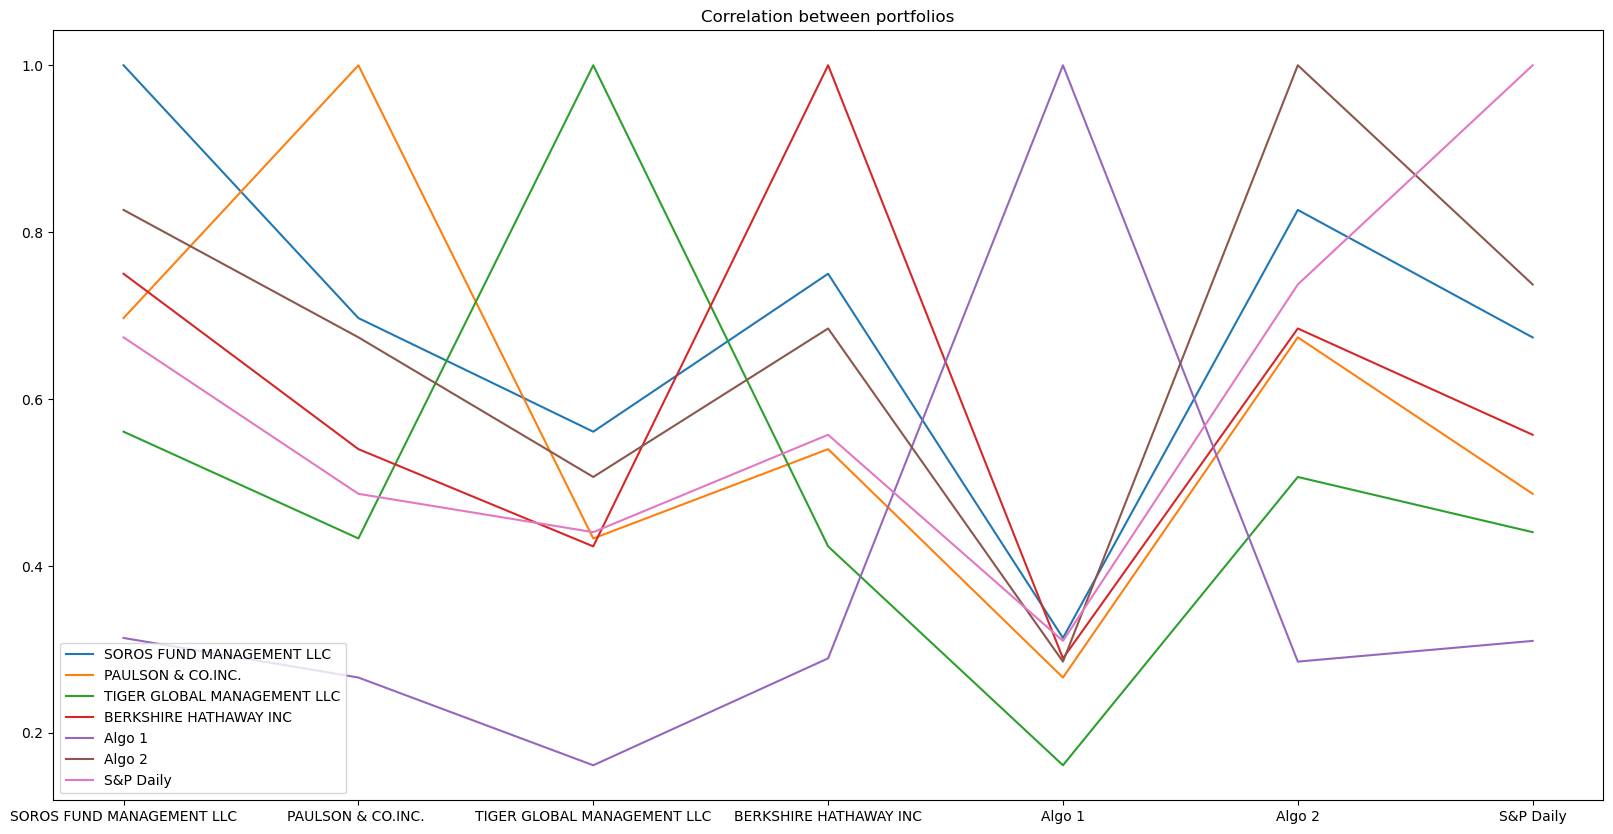

In [53]:
whale_corr.plot(figsize=(20,10), title="Correlation between portfolios")
# Soros Fund Management correlates closely to S&P TSX.

In [54]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P TSX 60.
# beta = covariance[0,1]/covariance[1,1]

In [55]:
soros_cov = whale_algo_sp_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(whale_algo_sp_df["S&P Daily"])
soros_cov

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000014
2019-04-26    0.000014
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000014
Length: 1029, dtype: float64

<AxesSubplot:>

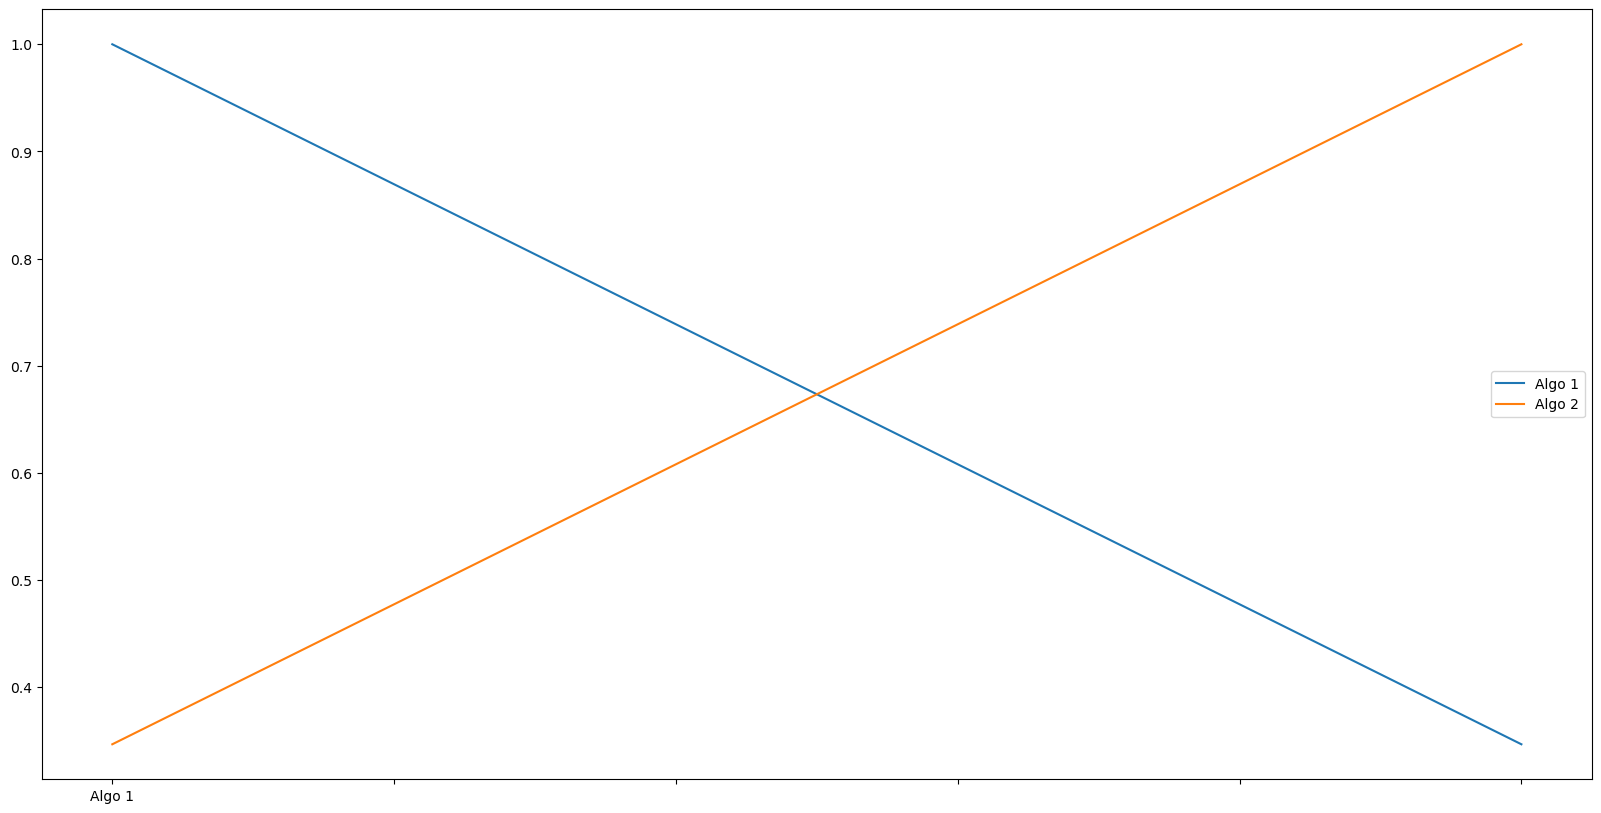

In [56]:
algo_sp_corr = algo_returns_df.corr()
algo_sp_corr.plot(figsize=(20,10))

In [57]:
# Not working - looking for correlation
sp_tsx_daily_df_corr = sp_tsx_daily_df.corr()
sp_tsx_daily_df_corr.plot(figsize=(20,10))

TypeError: corr() missing 1 required positional argument: 'other'

In [ ]:
sp_var = whale_algo_sp_df["S&P Daily"].rolling(60).var()
sp_var

In [ ]:
beta = (soros_cov / sp_var)
beta.plot(figsize=(20,10))

In [ ]:
# Rolling Statistics Challenge: Exponentially Weighted Average
# An alternative method to calculate a rolling window is to find the exponentially weighted moving average. 
# This is like a moving window average, but it assigns greater importance to more recent observations. 
# Try calculating the ewm Links to an external site. with a 21-day half-life.

In [ ]:
# run on combined portfolio for 21 days
# For exponentially weighted calculations,use the .ewm function
whale_algo_sp_df.ewm(halflife='21 days', times=pd.DatetimeIndex(whale_algo_sp_df['S&P Daily'])).mean()

In [ ]:
# Sharpe ratio calculation
sp_tsx_daily_df_sharpe = ((sp_tsx_daily_df.mean()*252) / (sp_tsx_daily_df.std()*np.sqrt(252)))
sp_tsx_daily_df_sharpe

In [ ]:
# Sharpe ratio calculation
whale_df_sharpe = ((whale_df.mean()*252) / (whale_df.std()*np.sqrt(252)))
whale_df_sharpe

In [ ]:
# Sharpe ratio calculation
algo_returns_df_sharpe = ((algo_returns_df.mean()*252) / (algo_returns_df.std()*np.sqrt(252)))
algo_returns_df_sharpe

In [ ]:
# Sharpe ratio calculation
shop_daily_df_sharpe = ((shop_daily_df.mean()*252) / (shop_daily_df.std()*np.sqrt(252)))
shop_daily_df_sharpe

In [ ]:
# Sharpe ratio calculation
l_daily_df_sharpe = ((l_daily_df.mean()*252) / (l_daily_df.std()*np.sqrt(252)))
l_daily_df_sharpe

In [ ]:
# Sharpe ratio calculation
otex_daily_df_sharpe = ((otex_daily_df.mean()*252) / (otex_daily_df.std()*np.sqrt(252)))
otex_daily_df_sharpe

In [ ]:
# Calculate the Cumulative Returns of ALL portfolios
sp_tsx_cum_df = (1 + sp_tsx_daily_df).cumprod()
tsx_perf = sp_tsx_cum_df.tail(1)
# tsx_perf.plot(kind='bar')

In [ ]:
# Calculate the Cumulative Returns of ALL portfolios
otex_cum_df = (1 + otex_daily_df).cumprod()
otex_perf = otex_cum_df.tail(1)
otex_perf


In [ ]:
# Calculate the Cumulative Returns of ALL portfolios
l_cum_df = (1 + l_daily_df).cumprod()
l_cum_perf = l_cum_df.tail(1)
l_cum_perf

In [ ]:
# Calculate the Cumulative Returns of ALL portfolios
shop_cum_df = (1 + shop_daily_df).cumprod()
shop_perf = shop_cum_df.tail(1)
shop_perf

In [ ]:
# Calculate the Cumulative Returns of ALL portfolios
algo_cum_df = (1 + algo_returns_df).cumprod()
algo_cum_df.tail(1)

In [ ]:
# Calculate the Cumulative Returns of ALL portfolios
whale_cum_df = (1 + whale_df).cumprod()
whale_cum_df.tail(1)
whale_cum_df

In [ ]:
# Calculating the weighted return of the entire Whale portfolio.
weights = [0.25, 0.25, 0.25, 0.25]
whale_portfolio_returns = whale_cum_df.dot(weights)
whale_perf = whale_portfolio_returns.tail(1)
whale_perf

In [ ]:
# Calculating the weighted return of the entire Algo portfolio.
weights = [0.50, 0.50]
algo_portfolio_returns = algo_cum_df.dot(weights)
algo_perf = algo_portfolio_returns.tail(1)
algo_perf